# BikeSharing Assignment

Create model which shows us demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bike = pd.read_csv("C:\\Upgrad\\MultipleLinearRegressionAssignment\\day.csv")

In [4]:
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
def custom_fn(a):
    if a==1:
        return 'spring'
    elif a==2:
        return 'summer'
    elif a==3:
        return 'fall'
    else:
        return 'winter'

bike.season = bike.season.apply(custom_fn)

In [10]:
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
bike.season = bike.season.astype('object')

In [12]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [13]:
def custom_fn(a):
    if a==1:
        return 'clear'
    elif a==2:
        return 'mist'
    elif a==3:
        return 'light'
    else:
        return 'heavy'

bike.weathersit = bike.weathersit.apply(custom_fn)

In [14]:
bike.weathersit.value_counts()

clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [15]:
bike.weathersit = bike.weathersit.astype('object')

In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


In [17]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


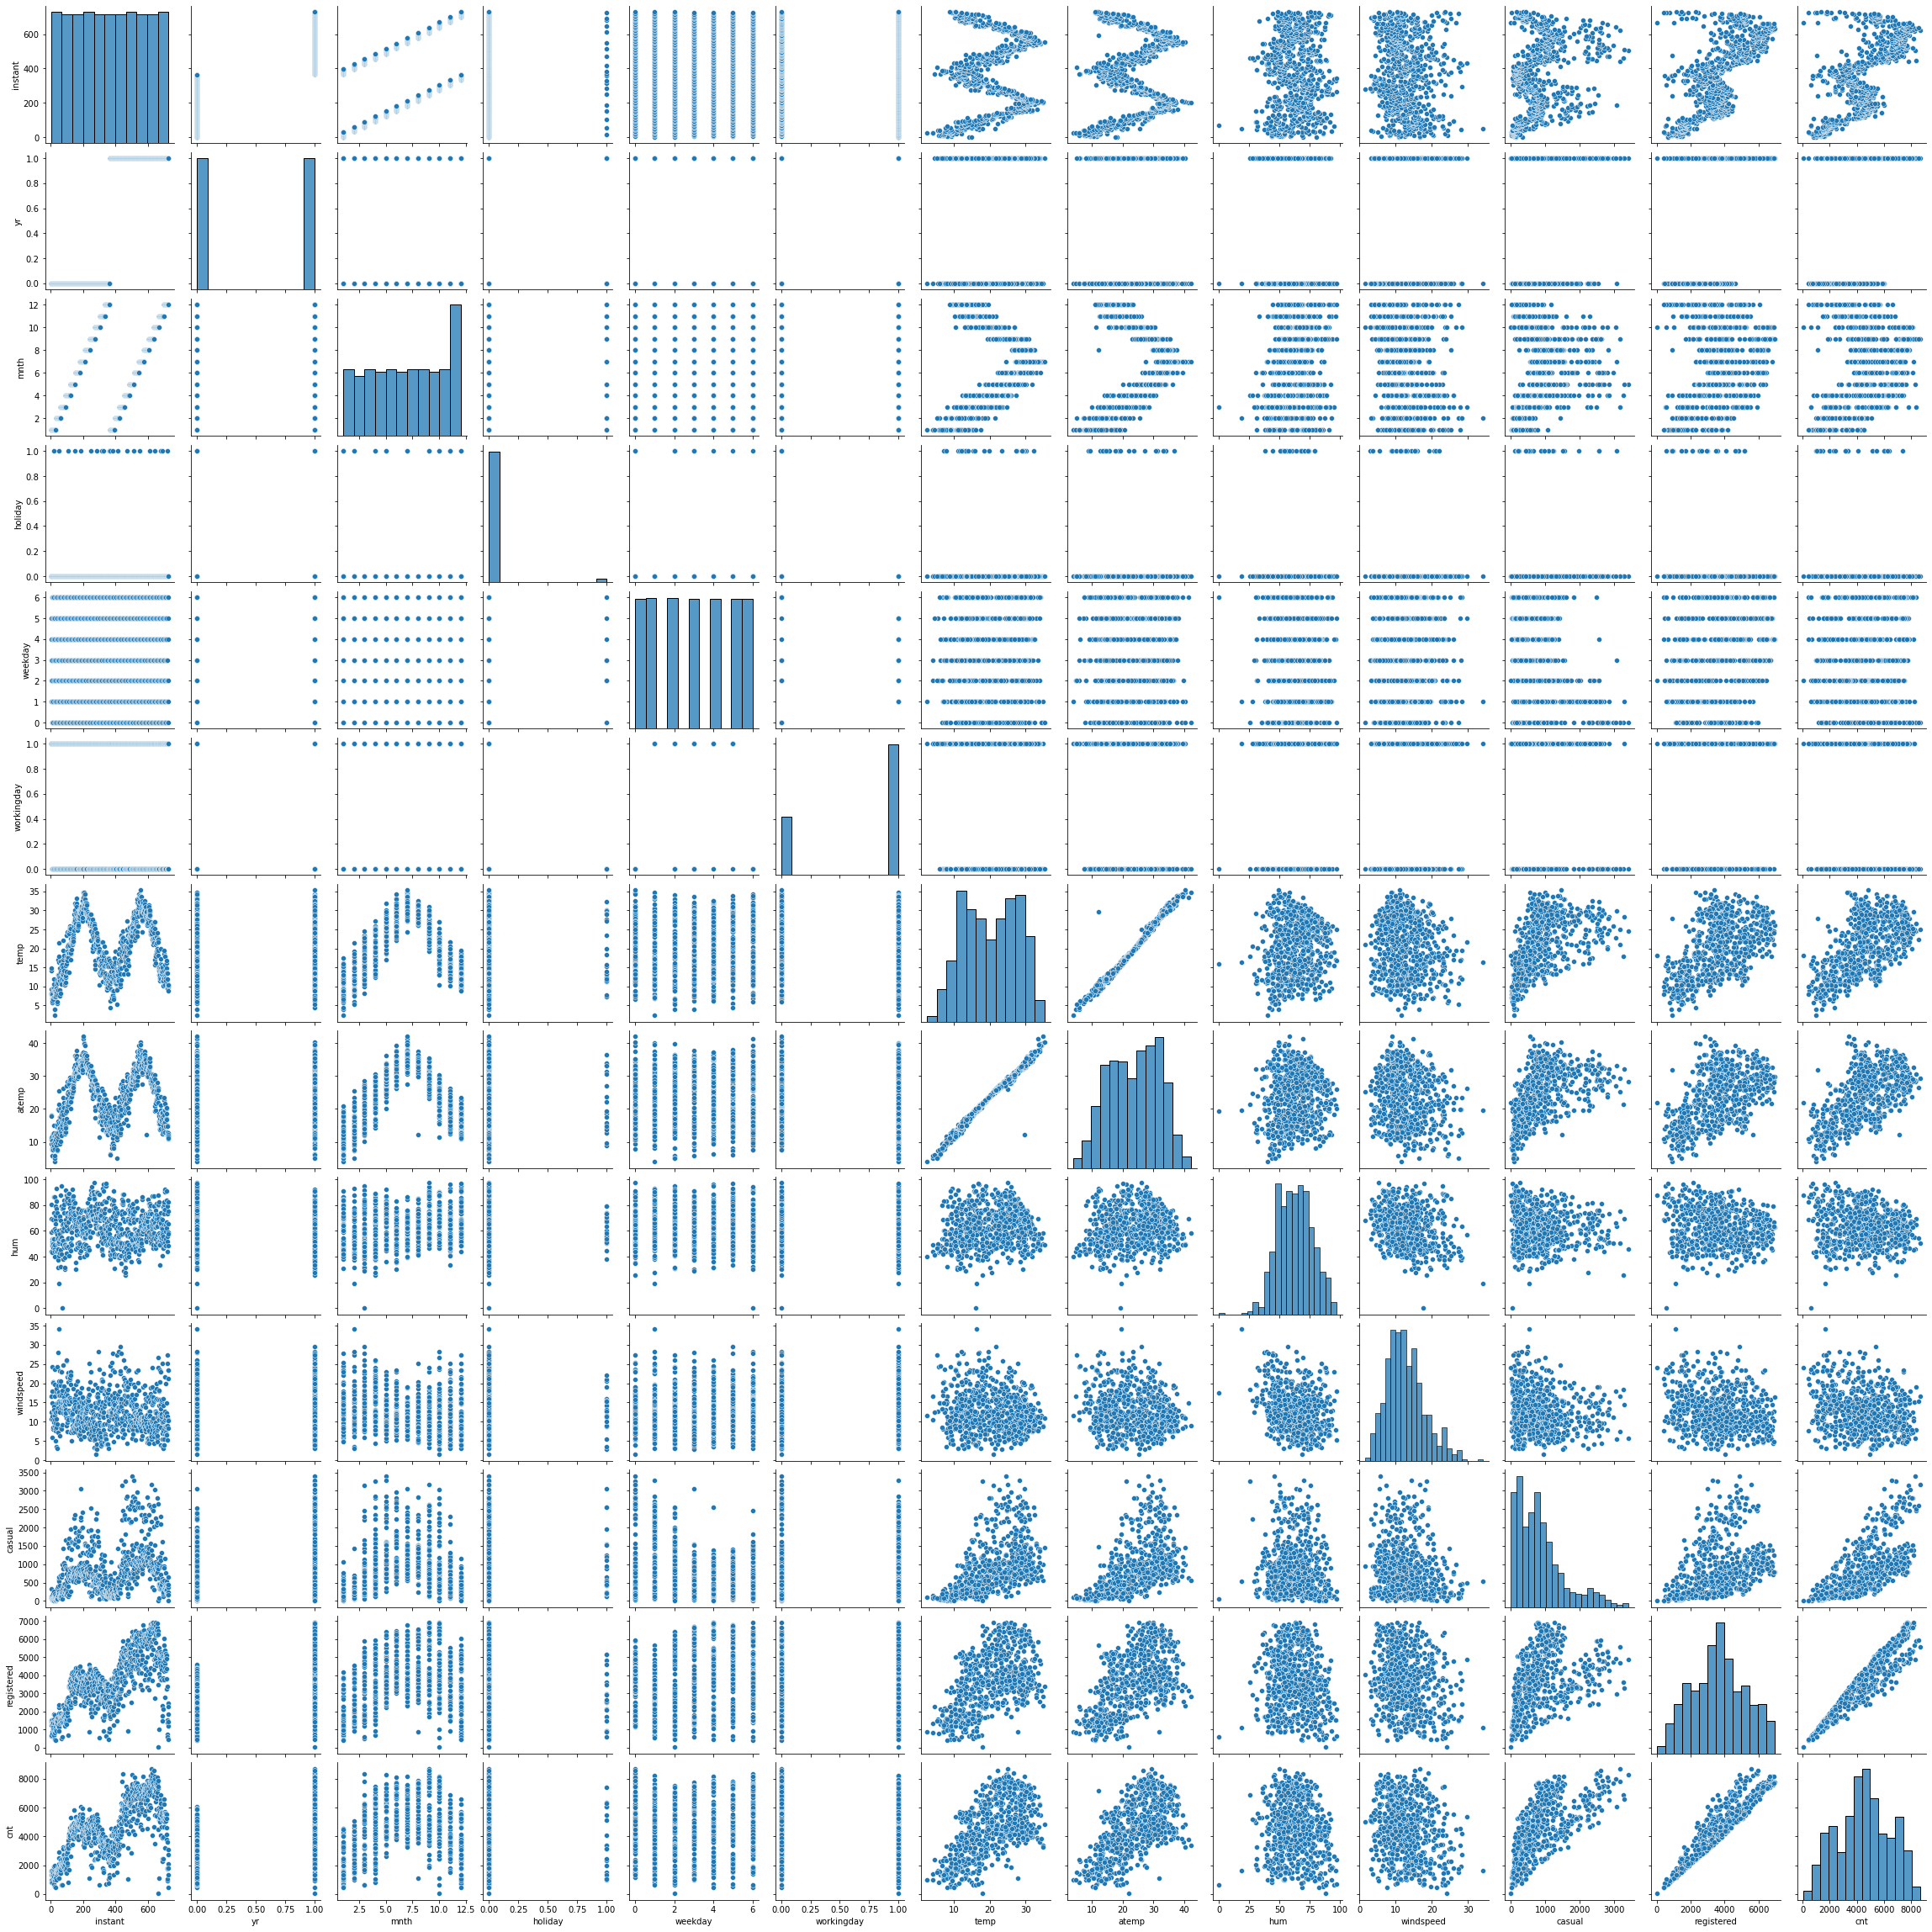

In [18]:
sns.pairplot(bike)
plt.show()

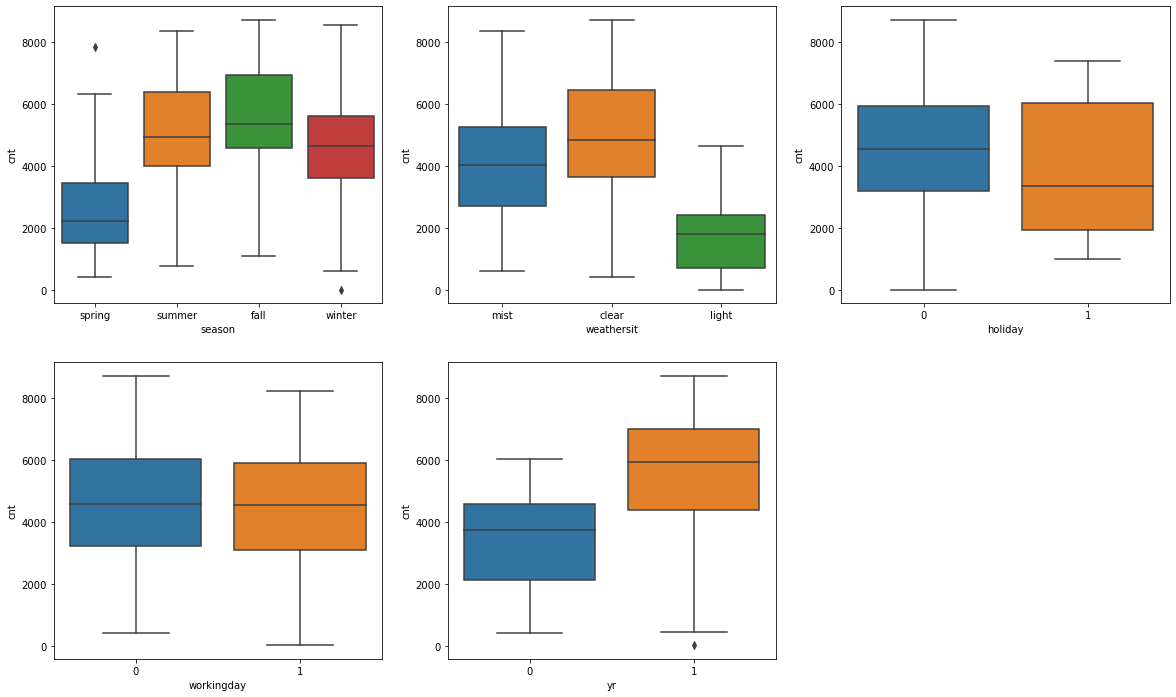

In [19]:
# Create box plots for the catgorical varibales

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

In [20]:
# Remove unwanted the columns like instant which is basically gives us count of records , dteday
bike.drop(['instant','dteday'],axis=1,inplace=True)

## Dummy Varibles

In [21]:
season = pd.get_dummies(bike['season'])

In [22]:
season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need four columns. You can drop the `season` column, as the type of season can be identified with just the last three columns where — 
- `000` will correspond to `fall`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [23]:
season = pd.get_dummies(bike['season'],drop_first=True)

In [24]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
# Drop 'season' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

In [26]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, season], axis = 1)

In [27]:
bike.spring= bike.spring.astype('int')
bike.summer= bike.summer.astype('int')
bike.winter= bike.winter.astype('int')

In [28]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [29]:
weathersit = pd.get_dummies(bike['weathersit'])

In [30]:
weathersit.sample(5)

,clear,light,mist
51,0,0,1
544,1,0,0
268,0,0,1
262,0,0,1
296,1,0,0


Now, we don't need four columns. You can drop the `weathersit` column, as the type of weather can be identified with just the last three columns where — 
- `00` will correspond to `clear`
- `01` will correspond to `mist`
- `10` will correspond to `light`

In [31]:
weathersit = pd.get_dummies(bike['weathersit'],drop_first=True)

In [32]:
weathersit.head()

,light,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [33]:
# Drop 'weathersit' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)

In [34]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weathersit], axis = 1)

In [35]:
bike.light= bike.spring.astype('int')
bike.mist= bike.summer.astype('int')

## Splitting the Data into Training and Testing Sets


In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt','casual','registered']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,light,mist
653,1,10,0,3,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0,0,1,0,0
576,1,7,0,3,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,0,0
426,1,3,0,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,0,1,0
728,1,12,0,1,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,1,0
482,1,4,0,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,0,1


In [39]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,light,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,6.549020,0.025490,2.950980,0.711765,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,0.245098,0.24902,0.243137,0.245098
std,0.500429,3.468714,0.157763,1.977166,0.453386,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,0.430568,0.43287,0.429398,0.430568
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


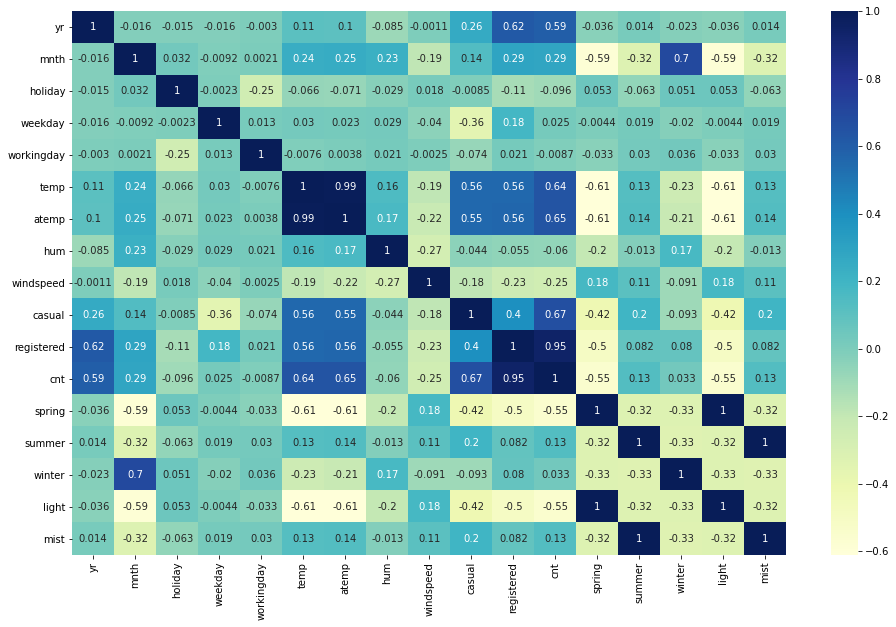

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can see, `registered` seems to the correlated to `cnt` the most. 
Let's see a pairplot for `registered` vs `cnt`.

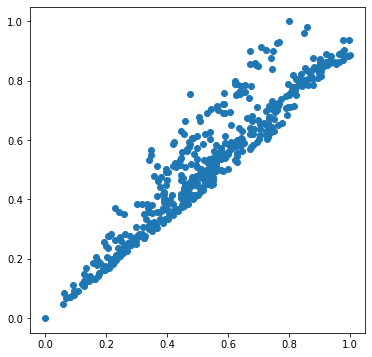

In [41]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.registered, df_train.cnt)
plt.show()

So, we pick `registered` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building a linear model

In [43]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['registered']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [44]:
# Check the parameters obtained

lr.params

const         0.024532
registered    0.933473
dtype: float64

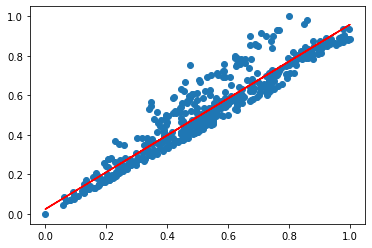

In [45]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], .0245 + .933*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [46]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4541.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          1.75e-255
Time:                        14:21:15   Log-Likelihood:                 624.12
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.008      3.099      0.0

The R-squared value obtained is `0.899`. Since we have so many variables, we can clearly do better than this. We are not taking the next variable `casual` , as this also represents count of rental bikes by users. And `casual` plus `registered` gives us the total count of rental bikes. And as `registered` users count are more lets try to build a model by adding other variable on top of it.
 So let's add the another variable high correlation i.e `atemp`.

In [47]:
# Assign all the feature variables to X
X_train_lm = X_train[['registered', 'atemp']]

In [48]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const        -0.017655
registered    0.841367
atemp         0.176309
dtype: float64

In [49]:
# Check the summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2854.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          1.18e-276
Time:                        14:21:15   Log-Likelihood:                 677.62
No. Observations:                 510   AIC:                            -1349.
Df Residuals:                     507   BIC:                            -1337.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0177      0.008     -2.174      0.0

As you can see with addition of `atemp` Rsquared value has increased to `0.918`. Lets see if we can increase r-squared to more by adding a `season`

In [50]:
# Assign all the feature variables to X
X_train_lm = X_train[['registered','atemp','spring']]

In [51]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const        -0.000019
registered    0.833558
atemp         0.158536
spring       -0.018207
dtype: float64

In [52]:
# Check the summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1917.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          7.65e-276
Time:                        14:21:15   Log-Likelihood:                 679.87
No. Observations:                 510   AIC:                            -1352.
Df Residuals:                     506   BIC:                            -1335.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.87e-05      0.012     -0.002      0.9

r-squared increased by `.001`. lets see if the r-squared increase after adding `yr`

In [53]:
# Assign all the feature variables to X
X_train_lm = X_train[['registered','atemp','spring','yr']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const         0.013638
registered    0.745911
atemp         0.183067
spring       -0.032111
yr            0.045412
dtype: float64

In [54]:
# Check the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1538.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          3.76e-281
Time:                        14:21:16   Log-Likelihood:                 696.12
No. Observations:                 510   AIC:                            -1382.
Df Residuals:                     505   BIC:                            -1361.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0136      0.012      1.185      0.2

As the r-squared value has increases to `.924` , lets try by adding all the variables and see if we can make a better model. and changing the season.

Creating a model with variables `registered`,`temp`,`summer`,`yr`,`weekday`,`windspeed` and `hum`

In [55]:
# Assign all the feature variables to X
X_train_lm = X_train[['registered','temp','summer','yr','weekday','windspeed','hum']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1216.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          3.81e-310
Time:                        14:21:16   Log-Likelihood:                 775.02
No. Observations:                 510   AIC:                            -1534.
Df Residuals:                     502   BIC:                            -1500.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0897      0.016      5.668      0.0

In [56]:
lr_4.params

const         0.089662
registered    0.808570
temp          0.173826
summer        0.026799
yr            0.025286
weekday      -0.015028
windspeed    -0.067997
hum          -0.071236
dtype: float64

Lets try if we can make the above model better by adding all the columns

## Adding all the columns

In [57]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.params

const         2.775558e-17
yr            4.041906e-16
mnth          9.801188e-17
holiday      -3.747003e-16
weekday      -5.941428e-16
workingday   -1.179612e-16
temp          8.881784e-16
atemp        -2.220446e-16
hum           3.469447e-17
windspeed    -4.163336e-17
casual        3.774735e-01
registered    7.968247e-01
spring       -1.457168e-16
summer        2.081668e-16
winter        2.498002e-16
light         1.040834e-17
mist          9.020562e-17
dtype: float64

In [58]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.396e+29
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:21:16   Log-Likelihood:                 16667.
No. Observations:                 510   AIC:                        -3.330e+04
Df Residuals:                     495   BIC:                        -3.324e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17   6.94e-16      0.040      0.9

After adding the all the variables we could the r-squared value has become 1 which means it is over fitting of line. This is not ideal model. Hence we might need to drop few columns


Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

## Checking VIF

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,spring,inf
12,summer,inf
14,light,inf
15,mist,inf
5,temp,392.71
6,atemp,368.30
10,registered,24.93
7,hum,20.82
1,mnth,15.44
9,casual,5.43


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `light` as it has high p-value as `0.958` and inf as `VIF`. Let's go ahead and drop this variables

In [61]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('light', 1)

In [62]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [63]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.428e+29
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:21:16   Log-Likelihood:                 16668.
No. Observations:                 510   AIC:                        -3.331e+04
Df Residuals:                     495   BIC:                        -3.324e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-17   6.93e-16     -0.120      0.9

Still the r-squared is not reduced. Lets find the VIF of remaining variables again.

In [64]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,summer,inf
14,mist,inf
5,temp,392.71
6,atemp,368.30
10,registered,24.93
7,hum,20.82
1,mnth,15.44
9,casual,5.43
8,windspeed,5.23
13,winter,5.08


Dropping `windspeed` as it is having high `p-value` and high VIF

In [65]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('windspeed', 1)

In [66]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.104e+30
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:21:16   Log-Likelihood:                 16750.
No. Observations:                 510   AIC:                        -3.347e+04
Df Residuals:                     496   BIC:                        -3.341e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.082e-16   5.44e-16     -0.383      0.7

In [68]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,summer,inf
13,mist,inf
5,temp,358.58
6,atemp,350.99
9,registered,24.15
7,hum,20.35
1,mnth,14.86
8,casual,5.31
12,winter,4.84
0,yr,4.73


Dropping `summer` as it is having high VIF

In [69]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('summer', 1)

In [70]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.328e+29
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:21:16   Log-Likelihood:                 16608.
No. Observations:                 510   AIC:                        -3.319e+04
Df Residuals:                     496   BIC:                        -3.313e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-16   7.18e-16     -0.966      0.3

In [72]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,358.58
6,atemp,350.99
9,registered,24.15
7,hum,20.35
1,mnth,14.86
8,casual,5.31
11,winter,4.84
0,yr,4.73
3,weekday,4.66
4,workingday,3.62


Dropping `spring` as it is having high p-value

In [73]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('spring', 1)

In [74]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [75]:
# Print the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.335e+30
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:21:16   Log-Likelihood:                 17011.
No. Observations:                 510   AIC:                        -3.400e+04
Df Residuals:                     497   BIC:                        -3.394e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.065e-16   2.04e-16     -2.481      0.0

In [76]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,atemp,350.56
5,temp,350.48
9,registered,24.05
1,mnth,14.19
7,hum,11.71
8,casual,5.21
0,yr,4.71
3,weekday,4.46
10,winter,4.20
4,workingday,3.43


Dropping `hum` because of high p-value and high VIF

In [77]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('hum', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.276e+29
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:21:16   Log-Likelihood:                 16396.
No. Observations:                 510   AIC:                        -3.277e+04
Df Residuals:                     498   BIC:                        -3.272e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.286e-17   4.59e-16     -0.159      0.8

In [78]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,350.44
6,atemp,346.25
8,registered,22.93
1,mnth,13.34
7,casual,5.21
0,yr,4.47
9,winter,4.16
3,weekday,4.05
4,workingday,3.07
10,mist,1.63


Dropping `temp` because of  high `p-value` and high `VIF`

In [79]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('temp', 1)

In [80]:

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.924e+30
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:21:16   Log-Likelihood:                 16823.
No. Observations:                 510   AIC:                        -3.362e+04
Df Residuals:                     499   BIC:                        -3.358e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.018e-16   1.99e-16     -1.519      0.1

In [81]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,registered,22.89
5,atemp,19.09
1,mnth,13.06
6,casual,5.15
0,yr,4.46
3,weekday,4.02
8,winter,3.90
4,workingday,3.06
9,mist,1.61
2,holiday,1.10


Drop `registered` as it is having high VIF

In [82]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('registered', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.6
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          4.80e-180
Time:                        14:21:16   Log-Likelihood:                 476.20
No. Observations:                 510   AIC:                            -932.4
Df Residuals:                     500   BIC:                            -890.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0116      0.017     -0.704      0.4

In [83]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,atemp,14.05
1,mnth,12.91
6,casual,5.12
7,winter,3.78
3,weekday,3.55
4,workingday,3.06
0,yr,2.14
8,mist,1.59
2,holiday,1.07


Dropping `workingday` because of high p-value

In [84]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('workingday', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     285.8
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          2.83e-181
Time:                        14:21:16   Log-Likelihood:                 476.17
No. Observations:                 510   AIC:                            -934.3
Df Residuals:                     501   BIC:                            -896.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0134      0.015     -0.899      0.3

In [85]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,13.48
1,mnth,12.80
5,casual,5.10
6,winter,3.76
3,weekday,3.47
0,yr,2.11
7,mist,1.56
2,holiday,1.03


Dropping `atemp` because of high VIF

In [86]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('atemp', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     225.0
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          2.42e-150
Time:                        14:21:17   Log-Likelihood:                 400.63
No. Observations:                 510   AIC:                            -785.3
Df Residuals:                     502   BIC:                            -751.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0490      0.016      2.998      0.0

In [87]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mnth,7.59
4,casual,3.50
3,weekday,2.81
5,winter,2.79
0,yr,2.11
6,mist,1.53
2,holiday,1.03


Dropping `mnth` because of high VIF

In [88]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('mnth', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     215.3
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          1.84e-135
Time:                        14:21:17   Log-Likelihood:                 362.92
No. Observations:                 510   AIC:                            -711.8
Df Residuals:                     503   BIC:                            -682.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1251      0.015      8.343      0.0

In [89]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,casual,2.20
0,yr,2.11
2,weekday,1.86
5,mist,1.51
4,winter,1.34
1,holiday,1.03


Dropping `mist` because of high p-value

In [90]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('mist', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     258.0
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          2.05e-136
Time:                        14:21:17   Log-Likelihood:                 362.28
No. Observations:                 510   AIC:                            -712.6
Df Residuals:                     504   BIC:                            -687.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1278      0.015      8.626      0.0

In [91]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,2.11
3,casual,1.92
2,weekday,1.70
4,winter,1.24
1,holiday,1.03


In [92]:
lr_16.params

const      0.127774
yr         0.190532
holiday   -0.126816
weekday    0.031086
casual     0.729602
winter     0.059362
dtype: float64

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

##  Residual Analysis of the train data

In [93]:
y_train_cnt = lr_16.predict(X_train_lm)

Text(0.5, 0, 'Errors')

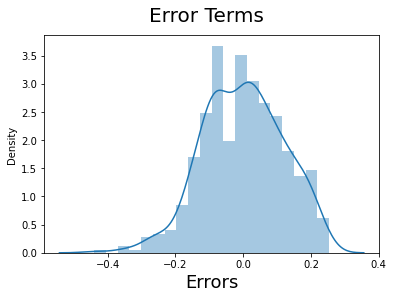

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the  Model 16

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the Sixteenth, i.e. `Sixteenth` model.

In [95]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt','casual','registered']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [96]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,light,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.036530,3.100457,0.639269,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,0.255708,0.264840,0.232877,0.255708,0.264840
std,0.500722,3.421875,0.188034,2.058536,0.481313,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,0.437258,0.442259,0.423633,0.437258,0.442259
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [97]:
y_test = df_test.pop('cnt')
X_test = df_test

In [98]:
# Adding constant variable to test dataframe
X_test_m16 = sm.add_constant(X_test)

In [99]:
X_test_m16.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,summer,winter,light,mist
184,1.0,0,7,1,3,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0,0,0,0,0
535,1.0,1,6,0,4,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0,1,0,0,1
299,1.0,0,10,0,6,0,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0,0,1,0,0
221,1.0,0,8,0,5,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0,0,0,0,0
152,1.0,0,6,0,6,0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0,1,0,0,1


In [100]:
# Creating X_test_m16 dataframe by dropping variables from X_test_m16

X_test_m16 = X_test_m16[["yr","const","casual","weekday","holiday","winter"]]

In [101]:
X_test_m16.head()

,yr,const,casual,weekday,holiday,winter
184,0,1.0,0.933557,3,1,0
535,1,1.0,0.265163,4,0,0
299,0,1.0,0.072539,6,0,1
221,0,1.0,0.268820,5,0,0
152,0,1.0,0.223712,6,0,0


In [102]:
# Making predictions using the Sixteenth model

y_pred_m16 = lr_16.predict(X_test_m16)

Text(0, 0.5, 'y_pred')

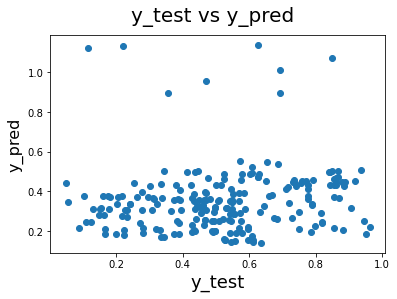

In [103]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m16)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## Calculating R2 score value

In [104]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred_m16)
r2

-0.98057870583745

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m16)
r_squared = r2_score(y_test, y_pred_m16)

In [106]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.09406918623899203
r_square_value : -0.98057870583745


## Since the r2 score obtained in the model is negative it is not a very good model. Lets try by Model 4 which had a r-squared value of .944 . 

In [107]:
# Assign all the feature variables to X
X_train_lm = X_train[['registered','temp','summer','yr','weekday','windspeed','hum']]

# Build a linear model

X_train_lm = sm.add_constant(X_train_lm)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1216.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          3.81e-310
Time:                        14:21:17   Log-Likelihood:                 775.02
No. Observations:                 510   AIC:                            -1534.
Df Residuals:                     502   BIC:                            -1500.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0897      0.016      5.668      0.0

##  Residual Analysis of the train data of Model 4

In [108]:
y_train_cnt = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

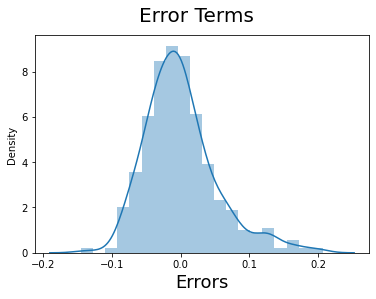

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions Using the  Model 4

Creating the X_test for `Model 4` as we have created y_test for `Model 16` , we can reuse the same.

In [110]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [111]:
X_test_m4 = X_test_m4[['registered','temp','summer','yr','weekday','windspeed','hum','const']]

In [112]:
# Making predictions using the Fourth model
y_pred_m4 = lr_4.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

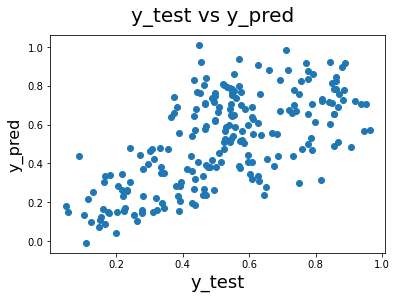

In [113]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

## R2 Score value for Model 4

In [114]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred_m4)
r2

0.2318964948208624

In [115]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m4)
r_squared = r2_score(y_test, y_pred_m4)

In [116]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0364816967215485
r_square_value : 0.2318964948208624


In [117]:
lr_4.params

const         0.089662
registered    0.808570
temp          0.173826
summer        0.026799
yr            0.025286
weekday      -0.015028
windspeed    -0.067997
hum          -0.071236
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt  = 0.808  \times  registered + 0.173  \times  temp + 0.028 \times summer + 0.025 \times yr - 0.015 \times weekday - 0.068 \times windspeed - 0.071 \times hum $

## Overall we have a better model and we can acknowledge that we can do better

The various features that impact the rental bikes are as follow
- Registered
- Temperature
- Summer
- year
- weekday
- windspeed
- humidity